In [75]:
import pickle
# import statsmodels.api as sm
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from utils.util import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
# %matplotlib inline
# sns.set_theme(style='darkgrid',context='talk')
sns.set_style("white") #  {darkgrid, whitegrid, dark, white, ticks}
# sns.set_context("paper")
sns.set_context("talk")

In [76]:
# ctx_order = 'first'
analyze_name = 'analyze_ttest'

In [77]:
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)
# ----------------------
lesion_p = 0.1
# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnn_lesion_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxF = pickle.load(f)
# ----------------------
ctx_order = 'last'
ctx_order_str = 'ctxL'
# ----------------------
with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnn_lesion_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxL = pickle.load(f)
# ----------------------
with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_trunc_results = pickle.load(f)
# ----------------------
with open('../../results/%s_results_mlp_cc.P' %(analyze_name), 'rb') as f:
    mlpcc_results = pickle.load(f)

In [78]:
mlp_runs             = dict_to_list(mlp_results, analyze_name)
rnn_runs_ctxF        = dict_to_list(rnn_results_ctxF, analyze_name)
rnncell_runs_ctxF    = dict_to_list(rnncell_results_ctxF, analyze_name)
rnnb_runs_ctxF       = dict_to_list(rnnb_results_ctxF, analyze_name)
rnn_lesion_runs_ctxF = dict_to_list(rnn_lesion_results_ctxF, analyze_name)
rnn_runs_ctxL        = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_runs_ctxL    = dict_to_list(rnncell_results_ctxL, analyze_name)
rnnb_runs_ctxL       = dict_to_list(rnnb_results_ctxL, analyze_name)
rnn_lesion_runs_ctxL = dict_to_list(rnn_lesion_results_ctxL, analyze_name)
swmlp_runs           = dict_to_list(swmlp_results, analyze_name)
mlpcc_runs           = dict_to_list(mlpcc_results, analyze_name)
mlp_runs.keys()

dict_keys(['t_stat_hidd', 't_p_val_hidd', 't_stat_embed', 't_p_val_embed', 't_grid', 't_p_val_grid'])

In [79]:
np.asarray(mlpcc_runs['t_stat_hidd']).shape

(20, 21)

In [80]:
val_str = 't_stat_hidd'
t_hidds_mlp = np.asarray(mlp_runs[val_str])

t_hidds_rnn_ctxF        = np.asarray(rnn_runs_ctxF[val_str])
t_hidds_rnncell_ctxF    = np.asarray(rnncell_runs_ctxF[val_str])
t_hidds_rnnb_ctxF       = np.asarray(rnnb_runs_ctxF[val_str])
t_hidds_rnn_lesion_ctxF = np.asarray(rnn_lesion_runs_ctxF[val_str])

t_hidds_rnn_ctxL        = np.asarray(rnn_runs_ctxL[val_str])
t_hidds_rnncell_ctxL    = np.asarray(rnncell_runs_ctxL[val_str])
t_hidds_rnnb_ctxL       = np.asarray(rnnb_runs_ctxL[val_str])
t_hidds_rnn_lesion_ctxL = np.asarray(rnn_lesion_runs_ctxL[val_str])

t_hidds_swmlp = np.asarray(swmlp_runs[val_str])
t_hidds_mlpcc = np.asarray(mlpcc_runs[val_str])

t_hidds_mlpcc.shape

(20, 21)

## ylim min and max

In [109]:
mi = min(min(np.min(t_hidds_mlp, axis=0)),  
         min(np.min(t_hidds_swmlp[:,:,0], axis=0)),
         min(np.min(t_hidds_swmlp[:,:,1], axis=0)),
         min(np.min(t_hidds_mlpcc, axis=0)),
         min(np.min(t_hidds_rnn_ctxF, axis=0)),
         min(np.min(t_hidds_rnncell_ctxF, axis=0)),
         min(np.min(t_hidds_rnnb_ctxF, axis=0)),
         min(np.min(t_hidds_rnn_ctxL, axis=0)),
         min(np.min(t_hidds_rnncell_ctxL, axis=0)),
         min(np.min(t_hidds_rnnb_ctxL, axis=0)))
mx = max(max(np.max(t_hidds_mlp, axis=0)),  
         max(np.max(t_hidds_swmlp[:,:,0], axis=0)), 
         max(np.max(t_hidds_swmlp[:,:,1], axis=0)),
         max(np.max(t_hidds_rnn_ctxF, axis=0)),
         max(np.max(t_hidds_rnncell_ctxF, axis=0)),
         max(np.max(t_hidds_rnnb_ctxF, axis=0)),
         max(np.max(t_hidds_rnn_ctxL, axis=0)),
         max(np.max(t_hidds_rnncell_ctxL, axis=0)),
         max(np.max(t_hidds_rnnb_ctxL, axis=0)))
mi = mi - 0.1
mx = mx + 0.1
print(mi, mx)
# mi, mx = -8.5, 11


-8.279633587183271 10.769753908609658


In [125]:
def plot_ttest(ctx_order, val, model_str, mfig_str, sub_title, ax):  
        runs, checkpoints = val.shape[0], val.shape[1]
        print('runs, checkpoints: ', runs, checkpoints)
        val_name = 'tvals_hidds'
        threshold = 1.96
        df = pd.DataFrame(val, columns= np.arange(checkpoints))
        df.insert(0, 'runs', np.arange(runs))
        df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
        # plot 
        # ax = axs
        ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
        ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
        ax.axhline(y=threshold, color='r', linewidth=2)
        ax.axhline(y=-1*threshold, color='r', linewidth=2)
        ax.set_ylim([mi, mx])
        ax.set_title(sub_title)
        if ctx_order is not None:
                fig.suptitle('T-test Results - %s - Ax %s' %(model_str, ctx_order), fontweight='bold', fontsize='25')
        else:
                fig.suptitle('T-test Results - %s' %(model_str), fontweight='bold', fontsize='25')

        plt.tight_layout()

        fig_str = '%s_ttest_results_%s_hidds' %(ctx_order_str, mfig_str)
        fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)
        fig.savefig(('../../figures/' + fig_str + '.png'), 
                bbox_inches = 'tight', pad_inches = 0)

# RNN

In [123]:
figx, figy = 12, 6

runs, checkpoints:  20 21


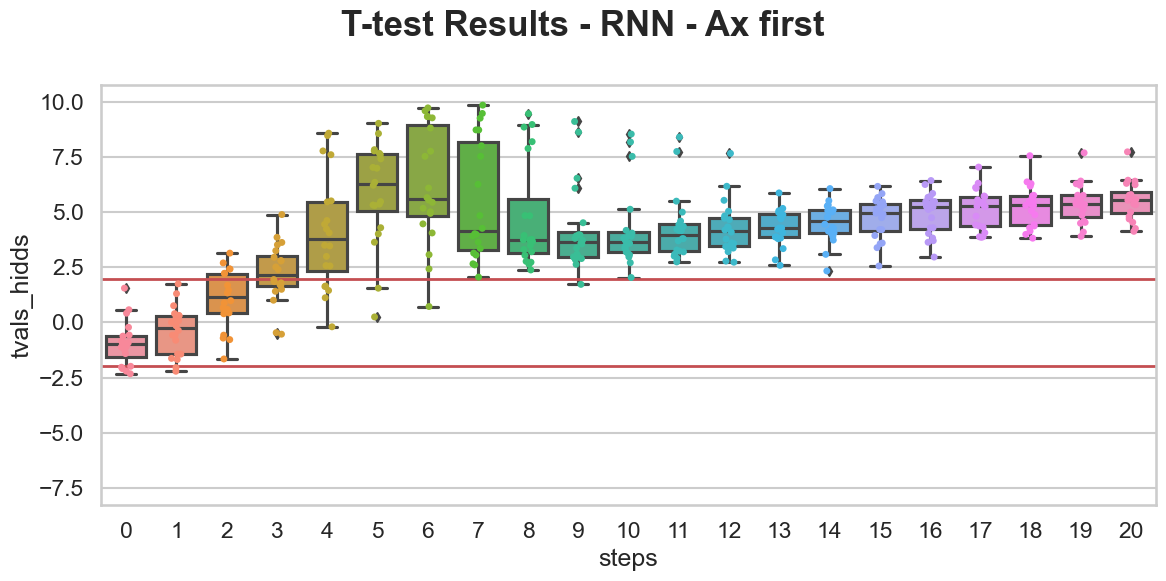

In [124]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = 'first'
plot_ttest(ctx_order, t_hidds_rnn_ctxF, 'RNN', 'rnn', '', ax)

runs, checkpoints:  20 21


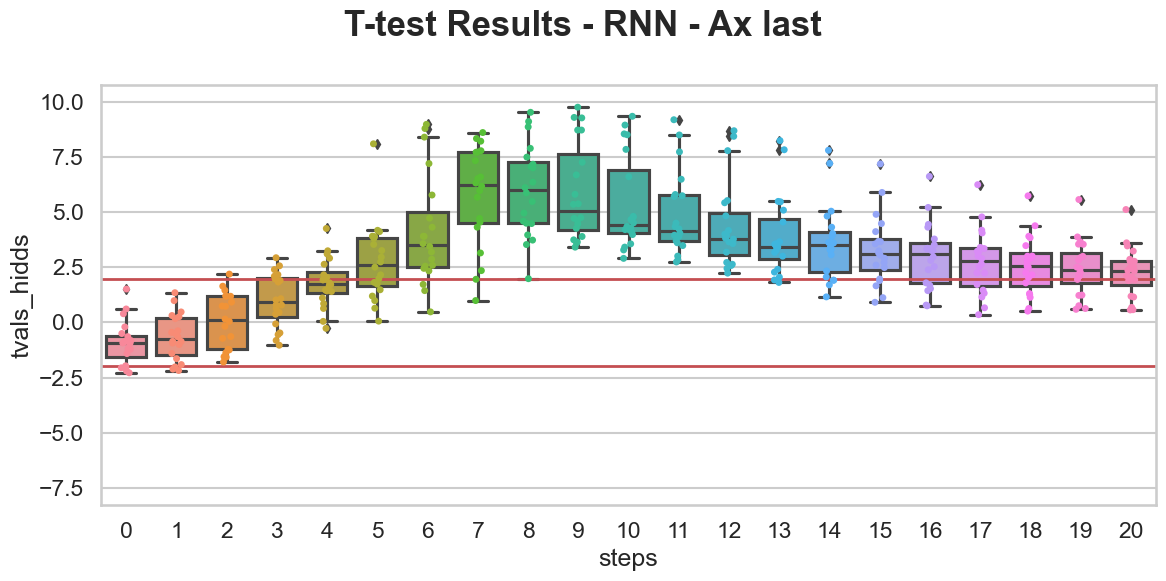

In [112]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = 'last'
plot_ttest(ctx_order, t_hidds_rnn_ctxL, 'RNN', 'rnn', '', ax)

# MLP

runs, checkpoints:  20 21


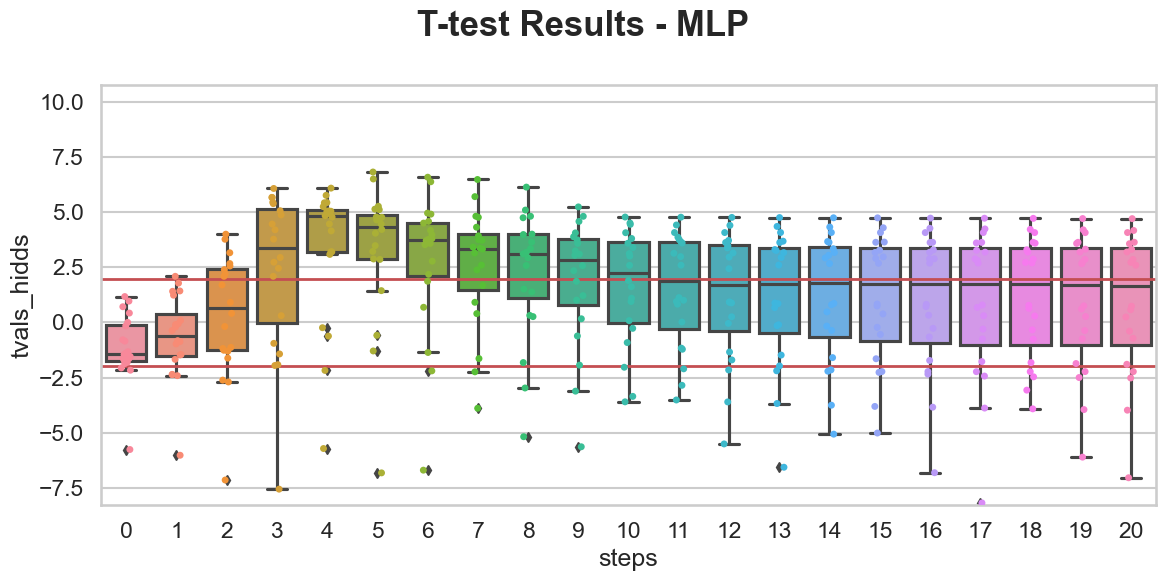

In [113]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = None
plot_ttest(ctx_order, t_hidds_mlp, 'MLP', 'mlp', '', ax)

# RNNCell - Truncated backprop

runs, checkpoints:  20 31


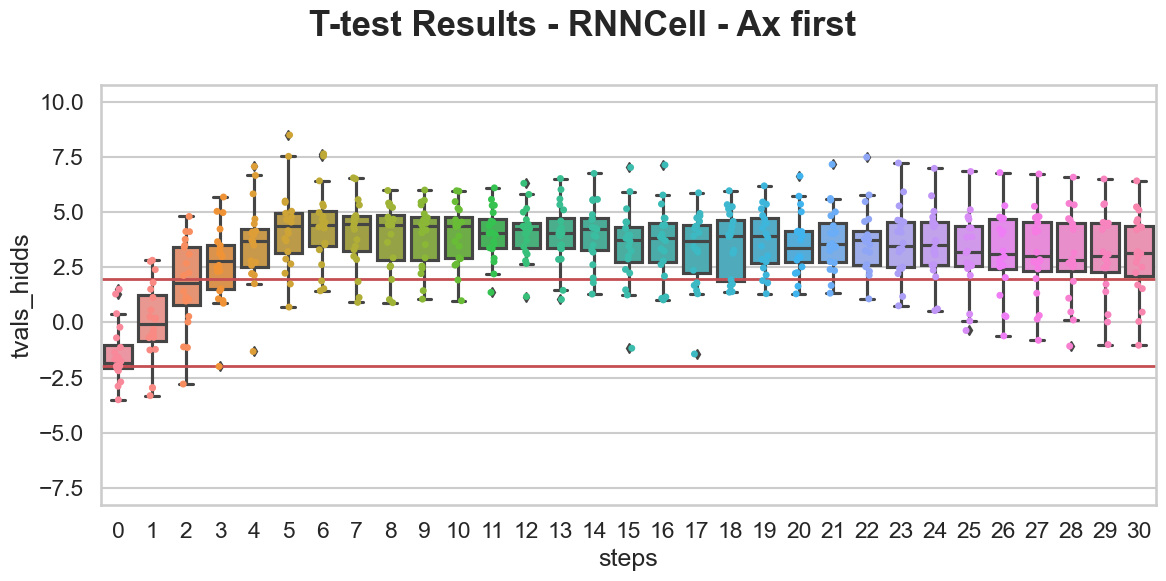

In [114]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = 'first'
plot_ttest(ctx_order, t_hidds_rnncell_ctxF, 'RNNCell', 'rnncell', '', ax)

runs, checkpoints:  20 31


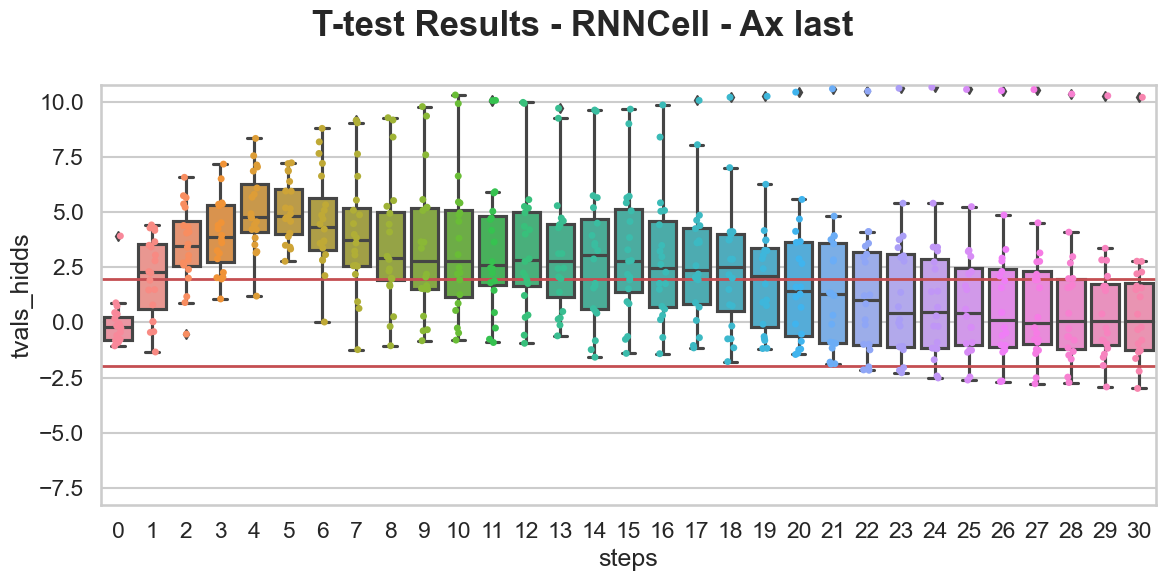

In [115]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = 'last'
plot_ttest(ctx_order, t_hidds_rnncell_ctxL, 'RNNCell', 'rnncell', '', ax)

# Lesioned RNN

runs, checkpoints:  20 21


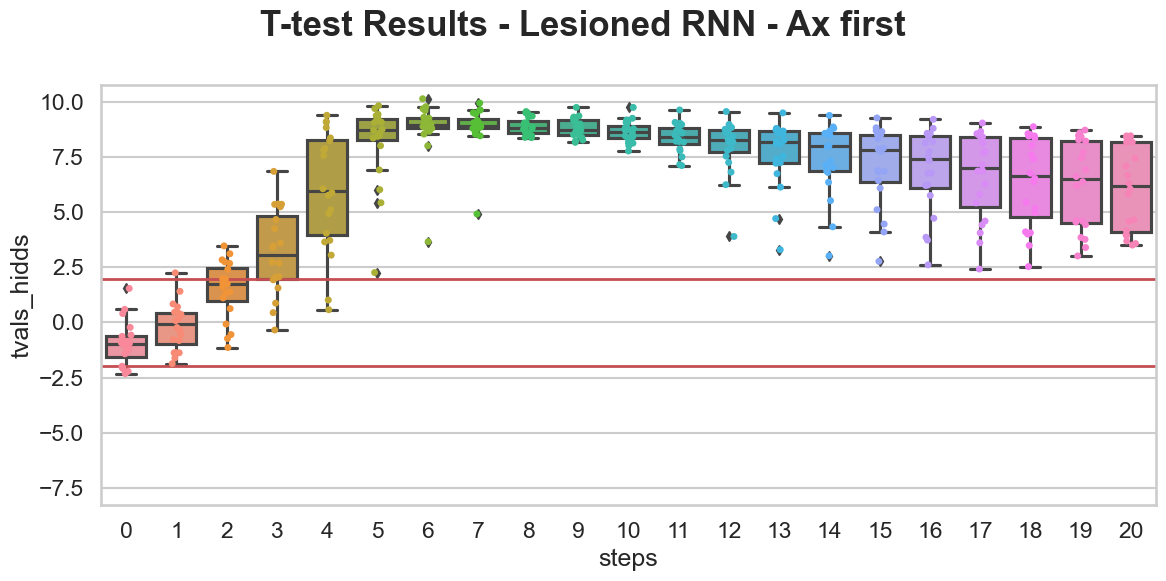

In [116]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = 'first'
plot_ttest(ctx_order, t_hidds_rnn_lesion_ctxF, 'Lesioned RNN', 'rnnlesionp0b1', '', ax)

runs, checkpoints:  20 21


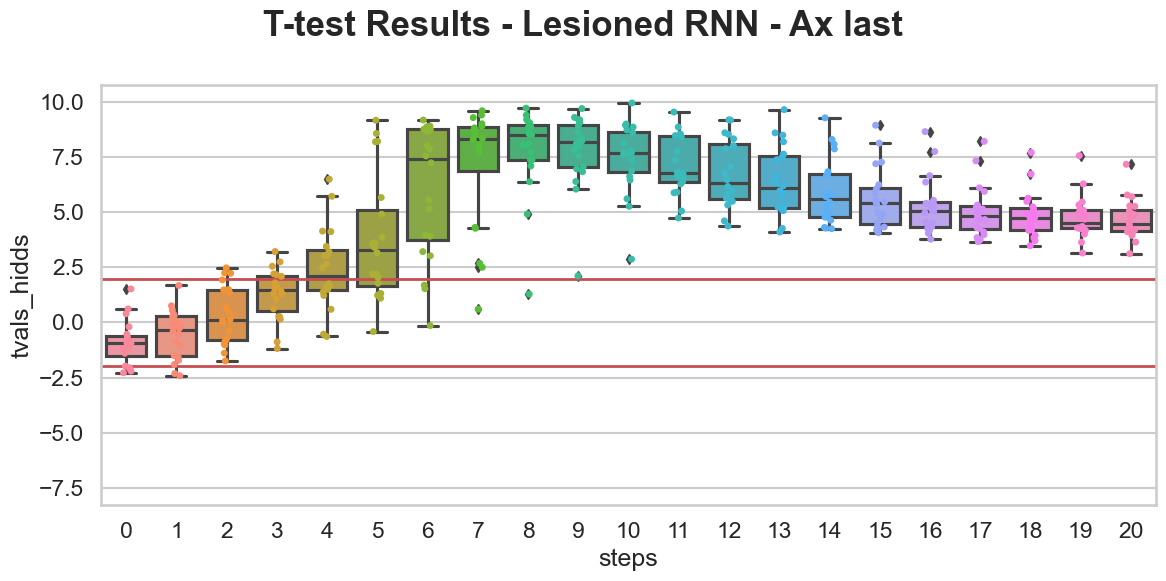

In [117]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = 'last'
plot_ttest(ctx_order, t_hidds_rnn_lesion_ctxL, 'Lesioned RNN', 'rnnlesionp0b1', '', ax)

# Cognitive Controller

runs, checkpoints:  20 21


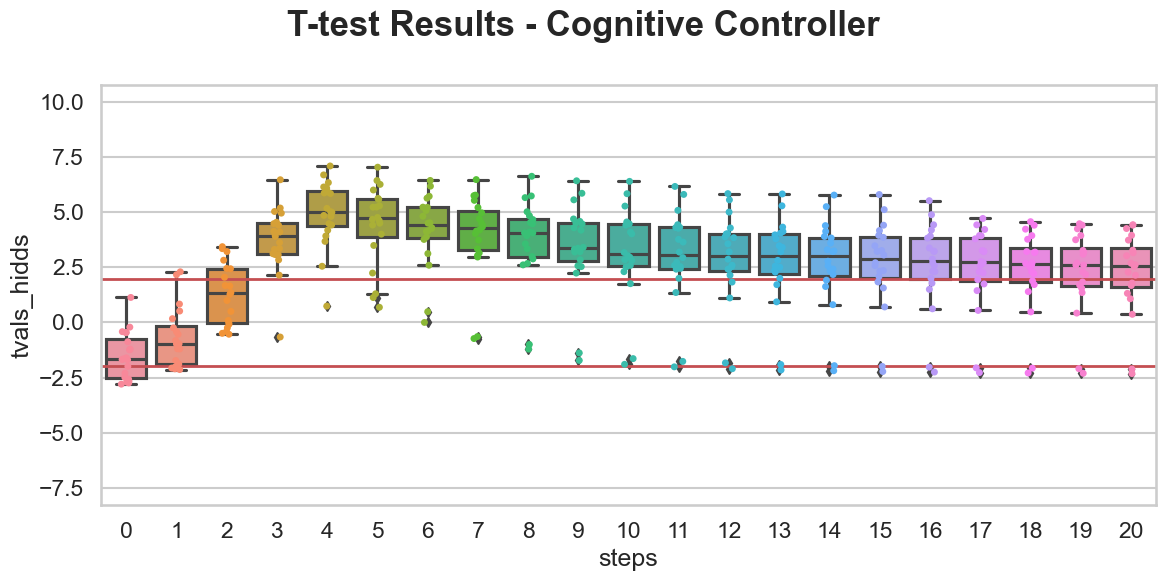

In [118]:
fig, ax = plt.subplots(figsize=(figx,figy))

ctx_order = None
plot_ttest(ctx_order, t_hidds_mlpcc, 'Cognitive Controller', 'mlpcc', '', ax)

# Stepwise MLP

runs, checkpoints:  20 21
runs, checkpoints:  20 21


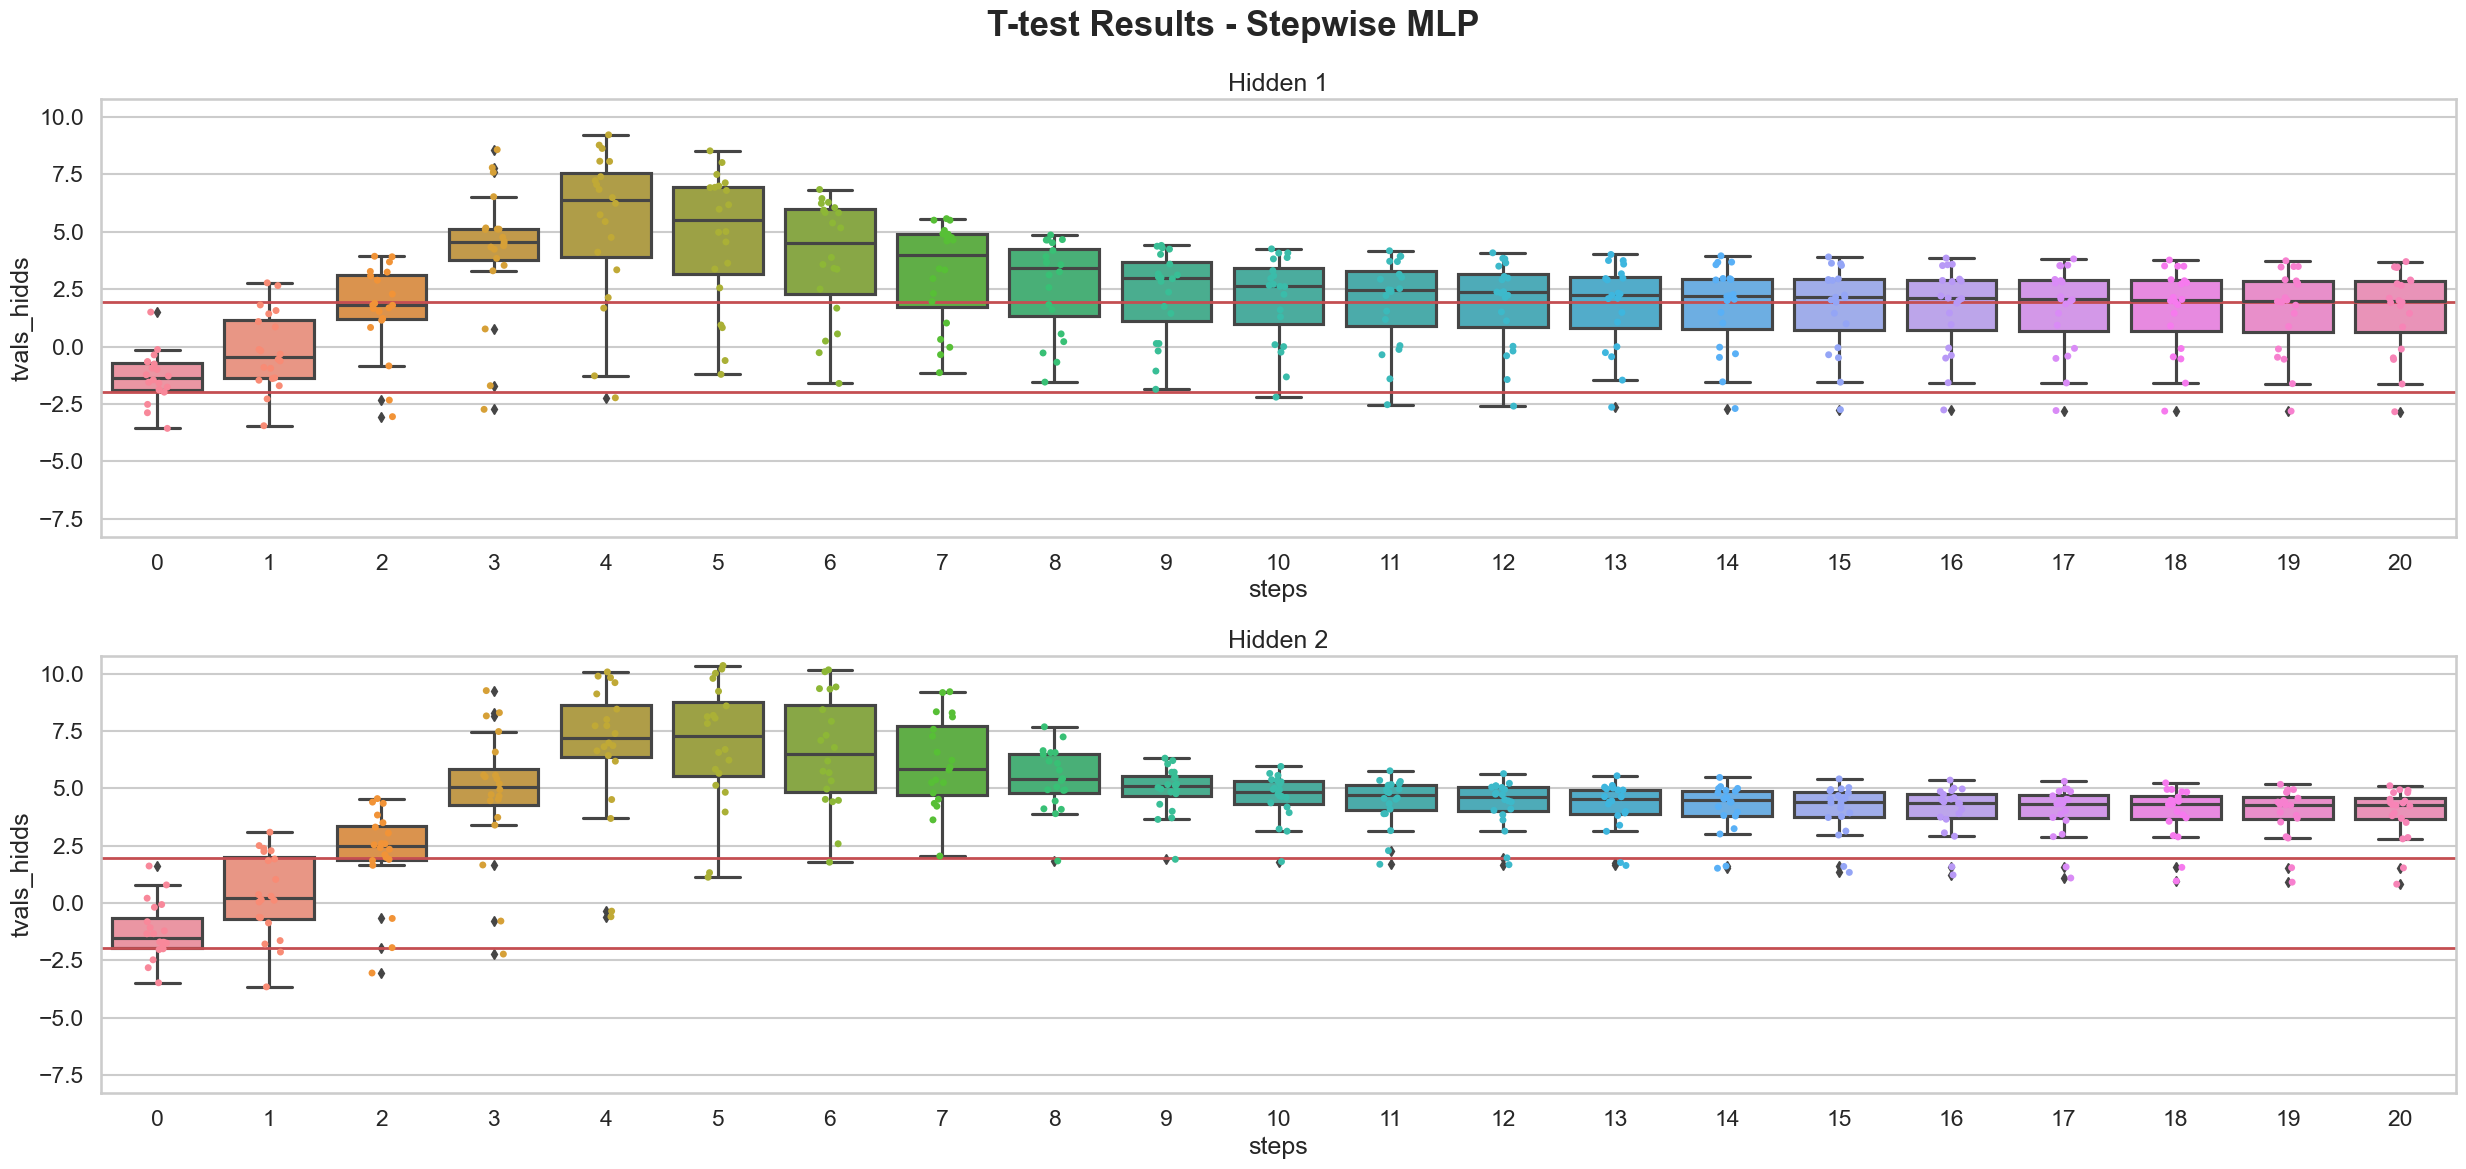

In [122]:
fig, axs = plt.subplots(2, 1, figsize=(25,12))


ctx_order, model_str, mfig_str = None, 'Stepwise MLP', 'swmlp'

sub_title  = 'Hidden 1'
val_res = t_hidds_swmlp[:,:,0] 
ax = axs[0]
plot_ttest(ctx_order, val_res, model_str, mfig_str, sub_title, ax)


sub_title  = 'Hidden 2'
val_res = t_hidds_swmlp[:,:,1] 
ax = axs[1]
plot_ttest(ctx_order, val_res, model_str, mfig_str, sub_title, ax)


# fig, axs = plt.subplots(2, 1, figsize=(15,12))
# val_name = 'tvals_hidds'
# threshold = 1.96
# sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
# sns.set_context("talk")

# val = t_hidds_swmlp[:,:,0]
# df = pd.DataFrame(val, columns= np.arange(checkpoints))
# df.insert(0, 'runs', np.arange(runs))
# df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# # plot
# ax = axs[0]
# ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
# ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
# ax.set_title('Hidden 1', fontsize='18')

# # Stepwise MLP - Hidden 2
# val = t_hidds_swmlp[:,:,1]
# df = pd.DataFrame(val, columns= np.arange(checkpoints))
# df.insert(0, 'runs', np.arange(runs))
# df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# # plot
# ax = axs[1]
# ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
# ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
# ax.set_title('Hidden 2', fontsize='18')


# for ax in axs.flatten():
#     ax.axhline(y=threshold, color='r', linewidth=2)
#     ax.axhline(y=-1*threshold, color='r', linewidth=2)
#     ax.set_ylim([mi, mx])

# fig.suptitle('T-test Results - Stepwise MLP', fontweight='bold', fontsize='25')
# plt.tight_layout()
# fig_str = '%s_ttest_results_swmlp_hidds' %(ctx_order_str)
# fig.savefig(('../../figures/' + fig_str + '.pdf'), 
#         bbox_inches = 'tight', pad_inches = 0)
# fig.savefig(('../../figures/' + fig_str + '.png'), 
#         bbox_inches = 'tight', pad_inches = 0)

# Plotting in subplots

## RNN and MLP

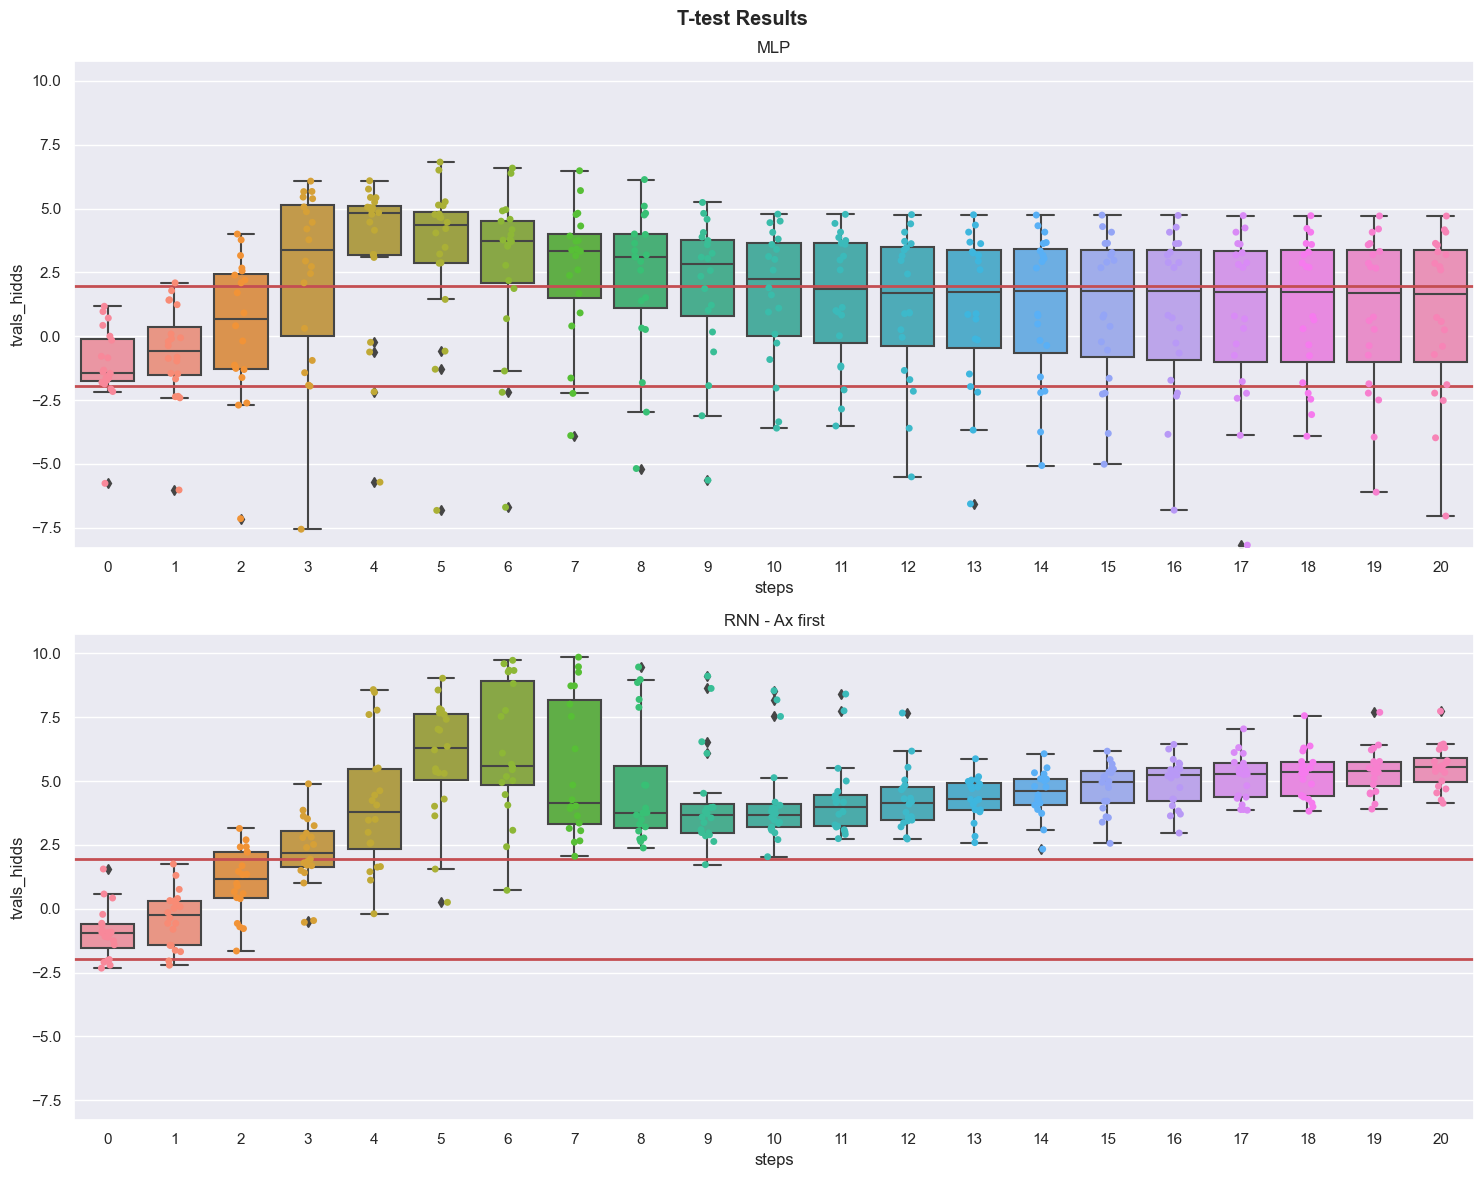

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
val_name = 'tvals_hidds'
threshold = 1.96
# MLP
val = t_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot 
ax = axs[0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN - Ax first
ctx_order = 'first'

val = t_hidds_rnn_ctxF
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ctx_order))

for ax in axs:
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.axhline(y=-1*threshold, color='r', linewidth=2)
    ax.set_ylim([mi, mx])

fig.suptitle('T-test Results', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ttest_results_both_models_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
        bbox_inches = 'tight', pad_inches = 0)

## Including StepwiseMLP

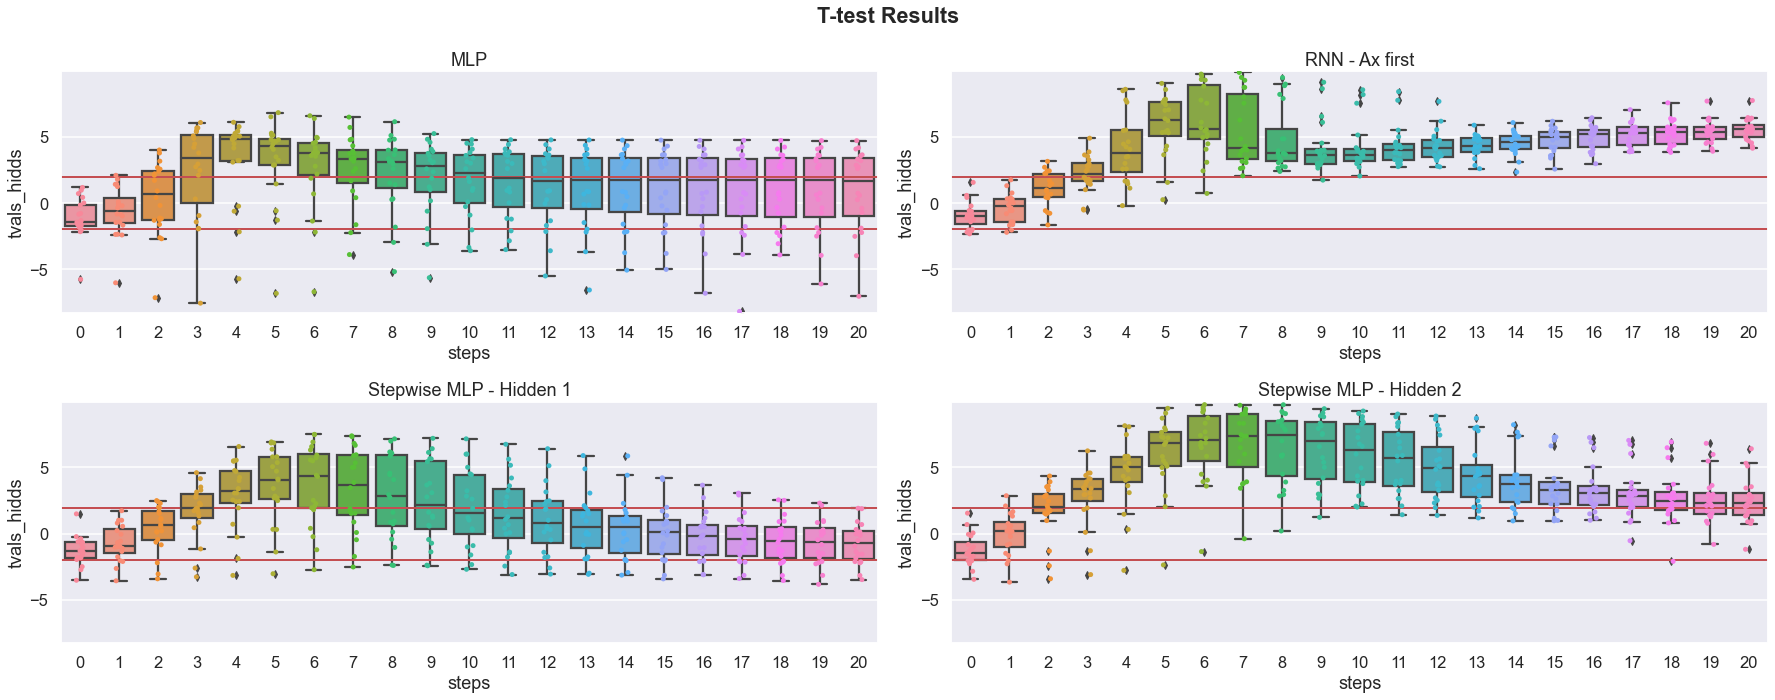

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(25,10))
val_name = 'tvals_hidds'
threshold = 1.96
# MLP
val = t_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot 
ax = axs[0][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = t_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ctx_order))

# Stepwise MLP - Hidden 1
val = t_hidds_swmlp[:,:,0]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 1')

# Stepwise MLP - Hidden 2
val = t_hidds_swmlp[:,:,1]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 2')


for ax in axs.flatten():
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.axhline(y=-1*threshold, color='r', linewidth=2)
    ax.set_ylim([mi, mx])

fig.suptitle('T-test Results', fontweight='bold')
plt.tight_layout()
plt.show()
fig_str = '%s_ttest_results_three_models_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
        bbox_inches = 'tight', pad_inches = 0)